In [1]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

In [24]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

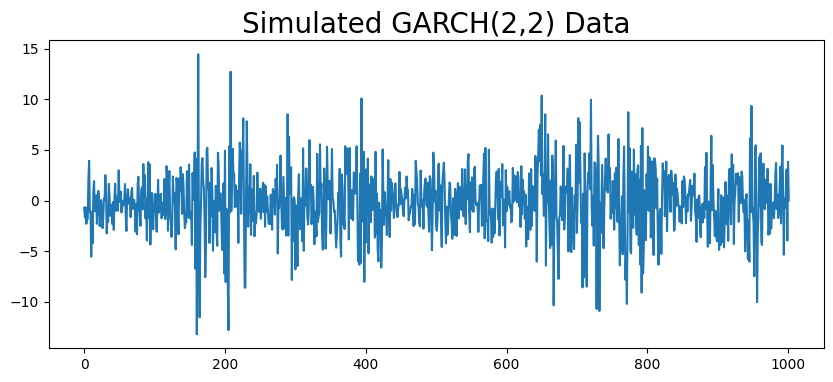

In [25]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

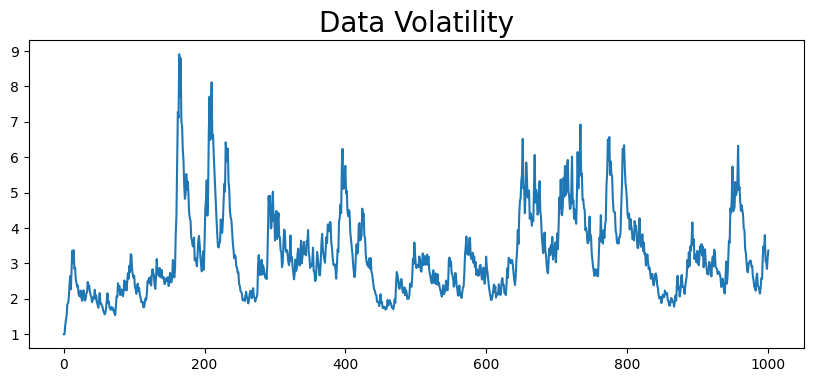

In [26]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

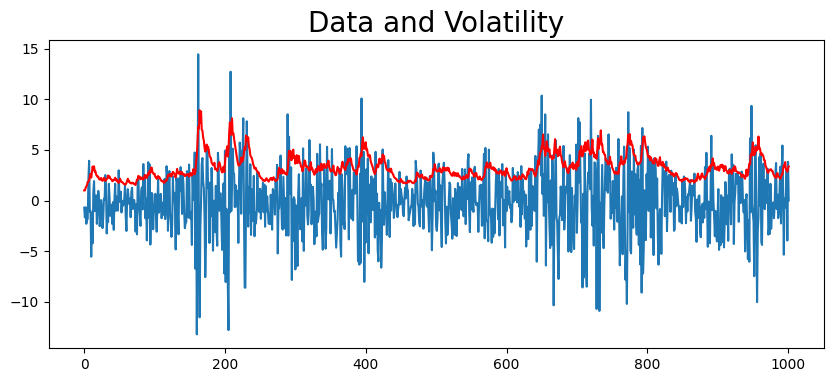

In [27]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

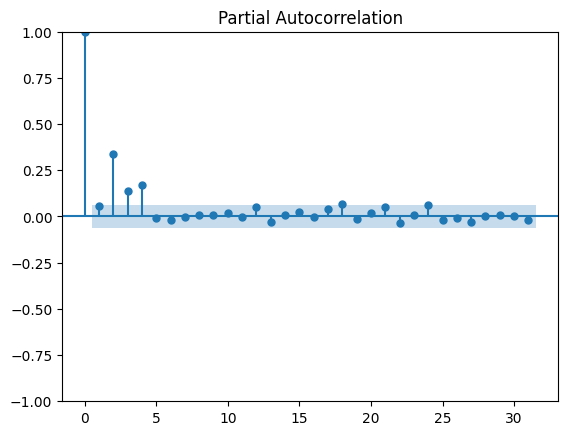

In [28]:
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [29]:
train, test = series[:-test_size], series[-test_size:]

In [30]:
model = arch_model(train, p=2, q=2)

In [31]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2487.924081842843
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2896.4129891182806
Iteration:      3,   Func. Count:     27,   Neg. LLF: 4075.0733221054497
Iteration:      4,   Func. Count:     36,   Neg. LLF: 2469.807390560759
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2251.4804244109887
Iteration:      6,   Func. Count:     53,   Neg. LLF: 2242.0360817748765
Iteration:      7,   Func. Count:     61,   Neg. LLF: 2230.185509124401
Iteration:      8,   Func. Count:     69,   Neg. LLF: 2224.584012135882
Iteration:      9,   Func. Count:     77,   Neg. LLF: 2233.284355922925
Iteration:     10,   Func. Count:     85,   Neg. LLF: 2224.0382513144423
Iteration:     11,   Func. Count:     92,   Neg. LLF: 2224.0168938252837
Iteration:     12,   Func. Count:     99,   Neg. LLF: 2224.0140718906423
Iteration:     13,   Func. Count:    106,   Neg. LLF: 2224.013941993353
Iteration:     14,   Func. Count:    113,   Neg. LLF: 222

In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2224.01
Distribution:                  Normal   AIC:                           4460.03
Method:            Maximum Likelihood   BIC:                           4488.86
                                        No. Observations:                  902
Date:                Tue, May 20 2025   Df Residuals:                      901
Time:                        22:25:52   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu            -0.1657  7.809e-02     -2.122  3.385e-02 [ -0.319,-1.264e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.4773      0.185      2.579  9.899e-03    [  0.115,  0.840]
alpha[1]       0.0313  4.804e-02      0.651      0.515 [-6.286e-02,  0.125]
alpha[2]       0.2549  4.594e-02      5.550  2.857e-08    [  0.165,  0.345]
beta[1]        0.2815      0.294      0.958      0.338    [ -0.294,  0.857]
beta[2]        0.3974      0.257      1.547      0.122    [ -0.106,  0.901]
===========================================================================

Covariance estimator: robust
"""

# Predict

In [33]:
predictions = model_fit.forecast(horizon=test_size)

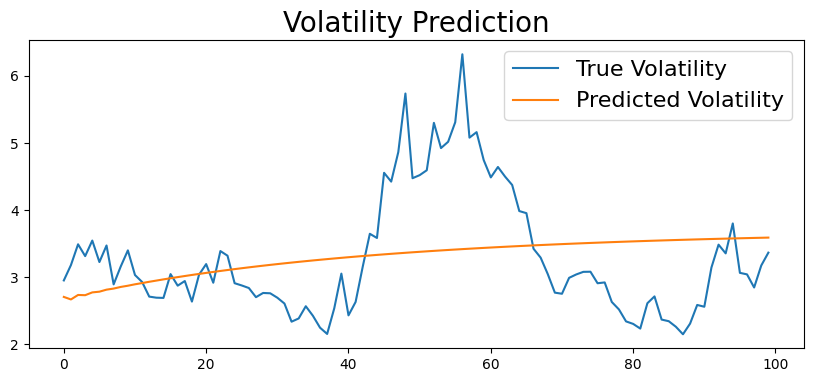

In [34]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

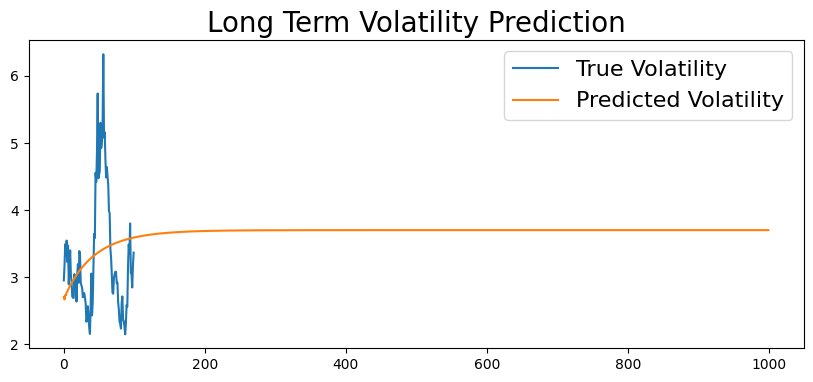

In [35]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [36]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

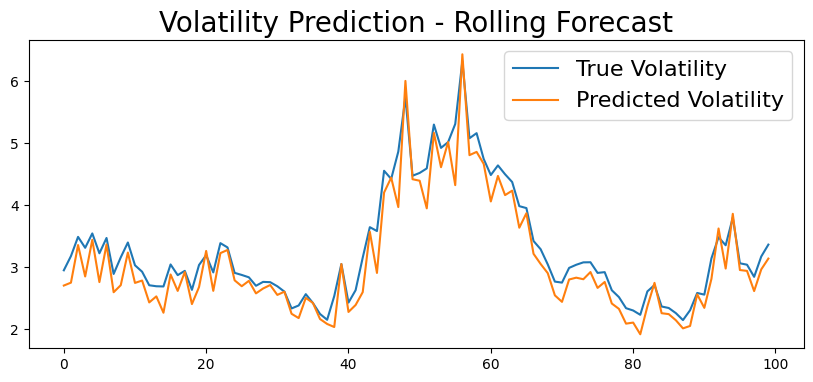

In [37]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)